In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## read in the individual replicate data from 6base
 these files were generated in 6base_correlation.ipynb

In [2]:
setwd("/data/hodges_lab/6L_seq/data")
modC_0day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day0_repavg_6base.bed")
modC_4day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day4_repavg_6base.bed")
modC_8day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day8_repavg_6base.bed")
head(modC_0day)
all_mod<- rbind(modC_0day, modC_4day, modC_8day)

Rows: 25232781 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): chr
dbl (14): start, end, p_hmCA, p_mCA, p_unmodCA, p_hmCB, p_mCB, p_unmodCB, nu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 23780485 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): chr
dbl (14): start, end, p_hmCA, p_mCA, p_unmodCA, p_hmCB, p_mCB, p_unmodCB, nu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25322368 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): chr
dbl (14): start, end, p_hmCA, p_mCA, p_unmodCA, p_hmCB, p_mCB, p_unmodCB, nu...

ℹ Use `spec()` to retrieve the full

chr,start,end,p_hmCA,p_mCA,p_unmodCA,p_hmCB,p_mCB,p_unmodCB,num_total.x,num_total.y,avg_phmC,avg_pmC,avg_punmodC,cov
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10468,10469,0.00000000,0.7333333,0.13333333,0.0000000,0.7500000,0,15,4,0.00000000,0.7416667,0.06666667,19
chr1,10470,10471,0.00000000,0.8666667,0.06666667,0.0000000,1.0000000,0,15,5,0.00000000,0.9333333,0.03333333,20
chr1,10483,10484,0.00000000,0.8235294,0.05882353,0.1666667,0.8333333,0,17,6,0.08333333,0.8284314,0.02941176,23
chr1,10488,10489,0.05555556,0.7777778,0.11111111,0.0000000,1.0000000,0,18,6,0.02777778,0.8888889,0.05555556,24
chr1,10492,10493,0.00000000,0.8421053,0.10526316,0.0000000,1.0000000,0,19,6,0.00000000,0.9210526,0.05263158,25
chr1,10496,10497,0.00000000,0.8421053,0.10526316,0.5000000,0.5000000,0,19,6,0.25000000,0.6710526,0.05263158,25


In [3]:
summary(all_mod$avg_pmC)
summary(all_mod$avg_phmC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.6042  0.7460  0.6737  0.8456  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.03421 0.04762 0.90909 

## read in ATAC-Me data from closest corresponding timepoints

In [4]:
day0_atacme<- read_tsv("/data/hodges_lab/NPCdiff_ATACme/data/methprocessed/NPCdiffATACme0hr_merge.cov5.meth", col_names = c("chr", "start", "strand", "context", "per_meth", "reads"))%>%
    filter(chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22")
day4_5_atacme<- read_tsv("/data/hodges_lab/NPCdiff_ATACme/data/methprocessed/NPCdiffATACme108hr_merge.cov5.meth", col_names = c("chr", "start", "strand", "context", "per_meth", "reads"))%>%
    filter(chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22")
day12_atacme<- read_tsv("/data/hodges_lab/NPCdiff_ATACme/data/methprocessed/NPCdiffATACme12day_merge.cov5.meth", col_names = c("chr", "start", "strand", "context", "per_meth", "reads"))%>%
    filter(chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22")
head(day12_atacme)

Rows: 3379745 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, strand, context
dbl (3): start, per_meth, reads

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6514456 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, strand, context
dbl (3): start, per_meth, reads

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3782678 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr, strand, context
dbl (3): start, per_meth, reads

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to qui

chr,start,strand,context,per_meth,reads
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr1,10468,+,CpG,0.600000,5
chr1,10470,+,CpG,0.600000,5
chr1,10562,+,CpG,0.428571,7
chr1,10570,+,CpG,0.200000,10
chr1,10576,+,CpG,0.111111,9
chr1,10578,+,CpG,0.000000,8


## Merge two datasets so can find the total number of CpGs that are measured in both datasets, 
### used in Table S4

In [5]:
day0_shared_cpg<- inner_join(day0_atacme, modC_0day, by = c("chr", "start"))%>% 
    mutate(end = start+1, avg_phmCmC = avg_pmC+avg_phmC)%>%
    select(chr, start, end, avg_phmCmC, per_meth, reads, cov)
head(day0_shared_cpg)
nrow(day0_atacme)
nrow(modC_0day)
nrow(drop_na(day0_shared_cpg))

day4_shared_cpg<- inner_join(day4_5_atacme, modC_4day,by = c("chr", "start"))%>% 
    mutate(end = start+1, avg_phmCmC = avg_pmC+avg_phmC)%>%
    select(chr, start, end, avg_phmCmC, per_meth, reads, cov)
head(day4_shared_cpg)
nrow(day4_5_atacme)
nrow(modC_4day)
nrow(drop_na(day4_shared_cpg))

day8_shared_cpg<- inner_join(day12_atacme, modC_8day, by = c("chr", "start"))%>% 
    mutate(end = start+1, avg_phmCmC = avg_pmC+avg_phmC)%>%
    select(chr, start, end, avg_phmCmC, per_meth, reads, cov)
head(day8_shared_cpg)
nrow(day12_atacme)
nrow(modC_8day)
nrow(drop_na(day8_shared_cpg))

chr,start,end,avg_phmCmC,per_meth,reads,cov
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10468,10469,0.7416667,1.000000,7,19
chr1,10470,10471,0.9333333,1.000000,7,20
chr1,10483,10484,0.9117647,1.000000,5,23
chr1,10488,10489,0.9166667,0.833333,6,24
chr1,10492,10493,0.9210526,1.000000,6,25
chr1,10496,10497,0.9210526,1.000000,6,25


[1] 3290102

[1] 25232781

[1] 2987803

chr,start,end,avg_phmCmC,per_meth,reads,cov
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10470,10471,0.8888889,1.000000,16,10
chr1,10483,10484,0.9545455,0.928571,14,13
chr1,10488,10489,1.0000000,0.928571,14,14
chr1,10492,10493,0.9615385,0.909091,11,15
chr1,10496,10497,1.0000000,0.818182,11,15
chr1,10524,10525,1.0000000,1.000000,5,12


[1] 6346919

[1] 23780485

[1] 5437350

chr,start,end,avg_phmCmC,per_meth,reads,cov
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10468,10469,0.8437500,0.600000,5,26
chr1,10470,10471,0.8500000,0.600000,5,25
chr1,10562,10563,1.0000000,0.428571,7,26
chr1,10570,10571,0.9444444,0.200000,10,26
chr1,10576,10577,0.9705882,0.111111,9,25
chr1,10578,10579,0.9411765,0.000000,8,25


[1] 3669071

[1] 25322368

[1] 3451893

In [6]:
write_tsv(day0_shared_cpg, file = "/data/hodges_lab/6L_seq/data/day0_shared_cpgs_hmCmC.bed")
write_tsv(day4_shared_cpg, file = "/data/hodges_lab/6L_seq/data/day4_shared_cpgs_hmCmC.bed")
write_tsv(day8_shared_cpg, file = "/data/hodges_lab/6L_seq/data/day8_shared_cpgs_hmCmC.bed")

---
# CpGs limited by accessibility 
## individual timepoint called peaks  

intersect these shared CpGs from above with peaks called at the 0 day/4.5 day/12 day timepoints, use bedtools in command line

```
module restore tools

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/peaks/Genrich/NPCdiffATACme0hr_filtered.narrowPeak \
    -b /data/hodges_lab/6L_seq/data/day0_shared_cpgs_hmCmC.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/0daypeak_day0_sharedcpgs_hmCmC.bed
    
bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/peaks/Genrich/NPCdiffATACme108hr_filtered.narrowPeak \
    -b /data/hodges_lab/6L_seq/data/day4_shared_cpgs_hmCmC.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/4_5daypeak_day4_sharedcpgs_hmCmC.bed
    
bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/peaks/Genrich/NPCdiffATACme12day_filtered.narrowPeak \
    -b /data/hodges_lab/6L_seq/data/day8_shared_cpgs_hmCmC.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/12daypeak_day8_sharedcpgs_hmCmC.bed
    
```

In [7]:
day0_day0acc<- read_tsv(file = "/data/hodges_lab/6L_seq/data/0daypeak_day0_sharedcpgs_hmCmC.bed", 
                       col_names = c("region_chr", "region_start", "region_end", "name", "score", "strand",
                                     "signalValue", "pvalue", "qvalue", "peak", "chr", "start", "end", 
                                     "sixbase", "atacme", "atac_reads", "six_cov"))
day0_day0acc_byreg<- day0_day0acc %>% group_by(region_chr, region_start, region_end)%>%
    summarise(atacme_avg= mean(atacme), sixbase_avg= mean(sixbase), atacme_cov= mean(atac_reads), sixbase_cov= mean(six_cov))

day4_day4acc<- read_tsv(file = "/data/hodges_lab/6L_seq/data/4_5daypeak_day4_sharedcpgs_hmCmC.bed", 
                       col_names = c("region_chr", "region_start", "region_end", "name", "score", "strand",
                                     "signalValue", "pvalue", "qvalue", "peak", "chr", "start", "end", 
                                     "sixbase", "atacme", "atac_reads", "six_cov"))
day4_day4acc_byreg<- day4_day4acc %>% group_by(region_chr, region_start, region_end)%>%
    summarise(atacme_avg= mean(atacme), sixbase_avg= mean(sixbase), atacme_cov= mean(atac_reads), sixbase_cov= mean(six_cov))

day8_day12acc<- read_tsv(file = "/data/hodges_lab/6L_seq/data/12daypeak_day8_sharedcpgs_hmCmC.bed", 
                       col_names = c("region_chr", "region_start", "region_end", "name", "score", "strand",
                                     "signalValue", "pvalue", "qvalue", "peak", "chr", "start", "end", 
                                     "sixbase", "atacme", "atac_reads", "six_cov"))
day8_day12acc_byreg<- day8_day12acc %>% group_by(region_chr, region_start, region_end)%>%
    summarise(atacme_avg= mean(atacme), sixbase_avg= mean(sixbase), atacme_cov= mean(atac_reads), sixbase_cov= mean(six_cov))


Rows: 809325 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): region_chr, name, strand, chr
dbl (13): region_start, region_end, score, signalValue, pvalue, qvalue, peak...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'region_chr', 'region_start'. You can
override using the `.groups` argument.
Rows: 1058731 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): region_chr, name, strand, chr
dbl (13): region_start, region_end, score, signalValue, pvalue, qvalue, peak...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'region_chr', 'region_start'. You can
override using the

## Plot the CpGs distance from peak center and perfect correlation line

In [8]:
dist<- function(x1,y1){
    a= 1
    b=-1
    c=0
    x1=x1
    y1=y1
    d= ((a*x1)+(b*y1)+c)/sqrt(a^2+b^2)
    d
}

day0_shared_cpg_plot <- day0_day0acc %>%
    mutate(peak_center = region_start+((region_end-region_start)/2), cpg_dist = abs(peak_center-start)/(region_end-region_start)) %>%
    mutate(line_dist= dist(atacme, sixbase))

day4_shared_cpg_plot <- day4_day4acc %>%
    mutate(peak_center = region_start+((region_end-region_start)/2), cpg_dist = abs(peak_center-start)/(region_end-region_start)) %>%
    mutate(line_dist= dist(atacme, sixbase))

day8_shared_cpg_plot <- day8_day12acc %>%    
    mutate(peak_center = region_start+((region_end-region_start)/2), cpg_dist = abs(peak_center-start)/(region_end-region_start)) %>%
    mutate(line_dist= dist(atacme, sixbase))
head(day8_shared_cpg_plot)

region_chr,region_start,region_end,name,score,strand,signalValue,pvalue,qvalue,peak,chr,start,end,sixbase,atacme,atac_reads,six_cov,peak_center,cpg_dist,line_dist
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,267930,268098,peak_0,1000,.,274.1347,6.408349,4.072465,109,chr1,268036,268037,0.2862069,0.0204082,49,39,268014.0,0.1309524,-0.18794806
chr1,267930,268098,peak_0,1000,.,274.1347,6.408349,4.072465,109,chr1,268042,268043,0.3429119,0.0238095,42,38,268014.0,0.1666667,-0.22563945
chr1,267930,268098,peak_0,1000,.,274.1347,6.408349,4.072465,109,chr1,268050,268051,0.1794872,0.0588235,34,32,268014.0,0.2142857,-0.08532211
chr1,267930,268098,peak_0,1000,.,274.1347,6.408349,4.072465,109,chr1,268067,268068,0.2119565,0.0555556,18,27,268014.0,0.3154762,-0.11059215
chr1,629037,632584,peak_1,1000,.,38408.4453,40.642361,33.234222,861,chr1,629135,629136,0.2222222,0.0000000,145,10,630810.5,0.4723710,-0.15713484
chr1,629037,632584,peak_1,1000,.,38408.4453,40.642361,33.234222,861,chr1,629153,629154,0.2222222,0.0000000,131,11,630810.5,0.4672963,-0.15713484


## Plot Figure S3F

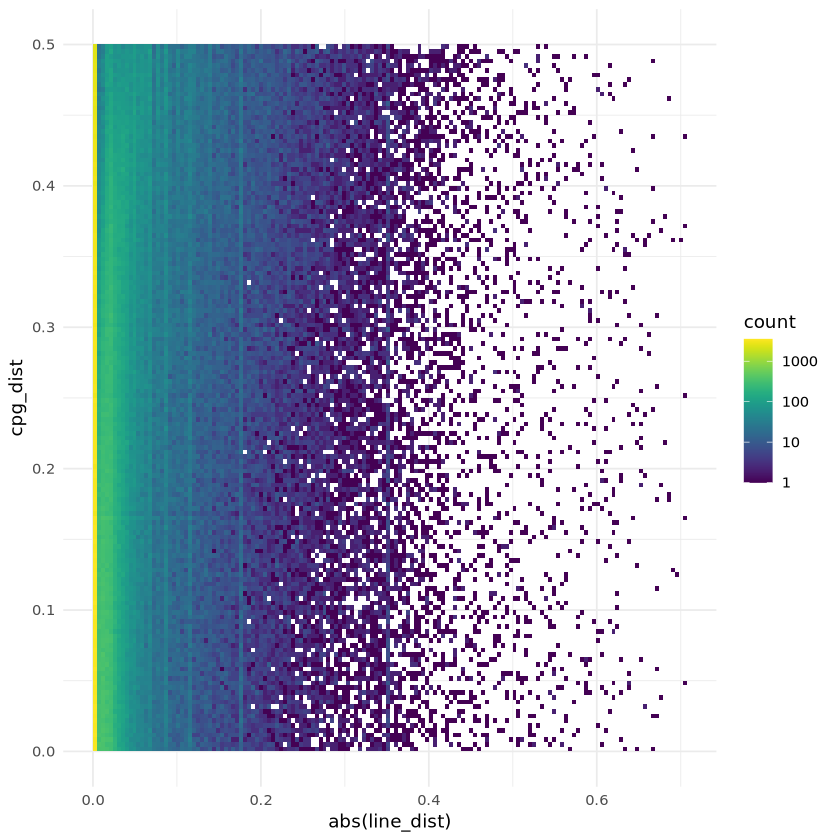

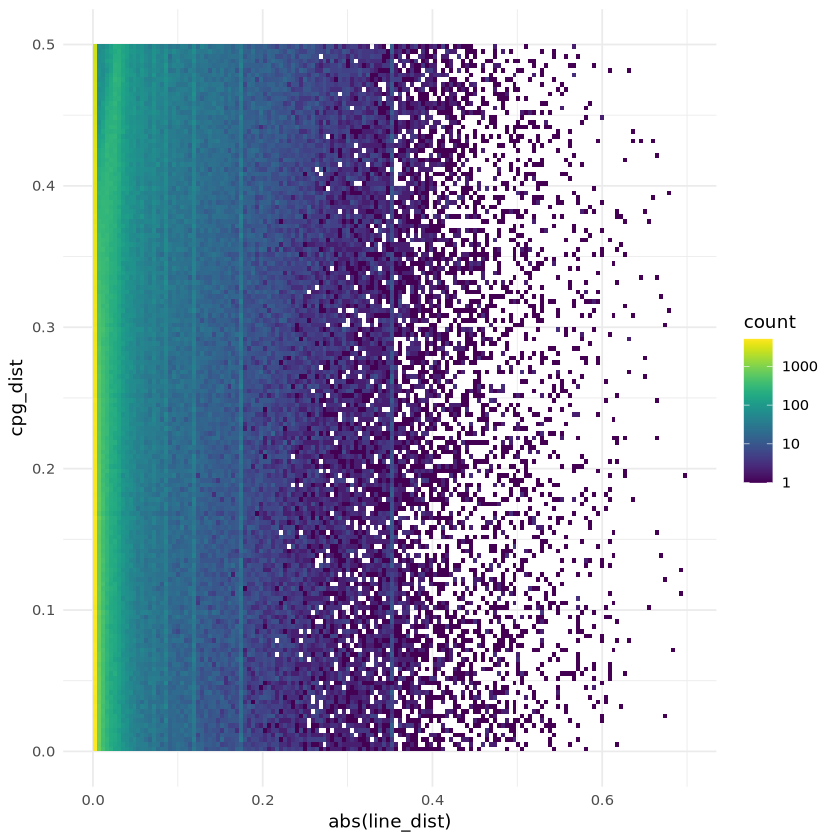

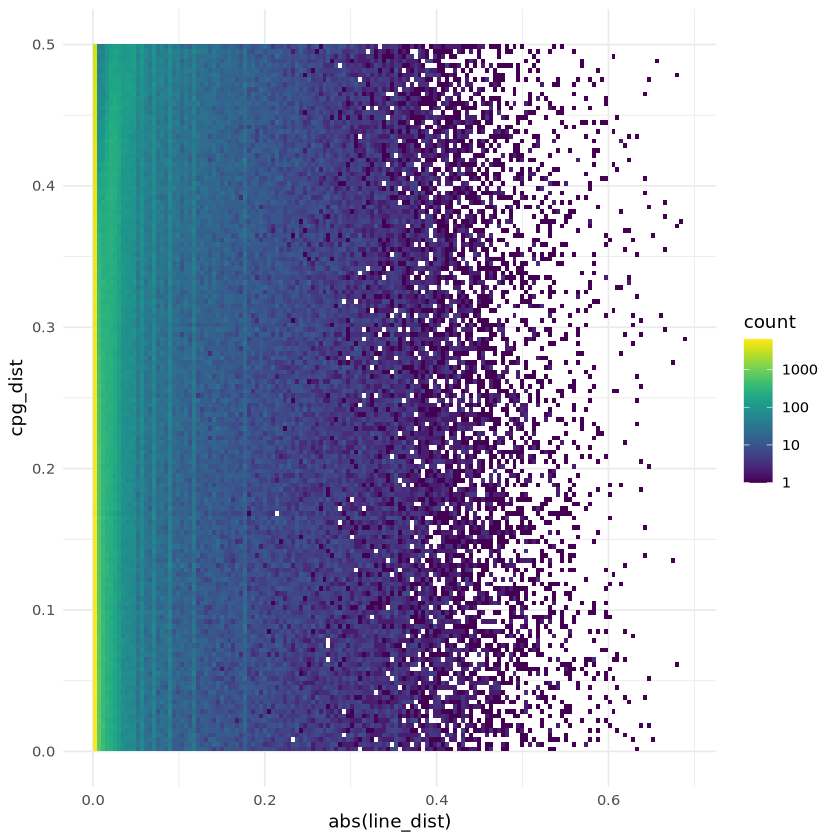

In [10]:
library(viridis)
dist_relation_p<- ggplot(day0_shared_cpg_plot, aes(x= abs(line_dist), y=cpg_dist))+
                geom_bin2d(bins =150)+
                scale_fill_viridis(trans = "log10")+
                theme_minimal()
dist_relation_p
dist4_relation_p<- ggplot(day4_shared_cpg_plot, aes(x= abs(line_dist), y=cpg_dist))+
                geom_bin2d(bins =150)+
                scale_fill_viridis(trans = "log10")+
                theme_minimal()
dist4_relation_p
dist8_relation_p<- ggplot(day8_shared_cpg_plot, aes(x= abs(line_dist), y=cpg_dist))+
                geom_bin2d(bins =150)+
                scale_fill_viridis(trans = "log10")+
                theme_minimal()
dist8_relation_p

#save plots
ggsave(dist_relation_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/0day_dist_relation_hmCmC_plot.pdf",
      unit= "in", height = 3.5, width = 4)
ggsave(dist4_relation_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/4day_dist_relation_hmCmC_plot.pdf",
      unit= "in", height = 3.5, width = 4)
ggsave(dist8_relation_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/8day_dist_relation_hmCmC_plot.pdf",
      unit= "in", height = 3.5, width = 4)

## Calculate the number of CpGs on and off-diagonal for Table S5

In [11]:
nrow(filter(day0_shared_cpg_plot, abs(line_dist) < 0.2))
#distance > 0.2 is below line, ATAC-Me is higher
nrow(filter(day0_shared_cpg_plot, line_dist >=0.2))
nrow(filter(day0_shared_cpg_plot, line_dist < -0.2))

nrow(filter(day4_shared_cpg_plot, abs(line_dist) < 0.2))
#distance > 0.2 is below line, ATAC-Me is higher
nrow(filter(day4_shared_cpg_plot, line_dist >=0.2))
nrow(filter(day4_shared_cpg_plot, line_dist < -0.2))

nrow(filter(day8_shared_cpg_plot, abs(line_dist) < 0.2))
#distance > 0.2 is below line, ATAC-Me is higher
nrow(filter(day8_shared_cpg_plot, line_dist >=0.2))
nrow(filter(day8_shared_cpg_plot, line_dist < -0.2))


[1] 790723

[1] 5091

[1] 13511

[1] 1033871

[1] 7289

[1] 17571

[1] 1213231

[1] 2321

[1] 31521

## Plot the distribution of ATAC-Me coverage and 6-base coverage on and off diagonal, Figure S3E
### CpG level

[1] 34.82332

[1] 29.25261

Warning message:
“Removed 32700 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


[1] 19.25137

[1] 21.22551

Warning message:
“Removed 361 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


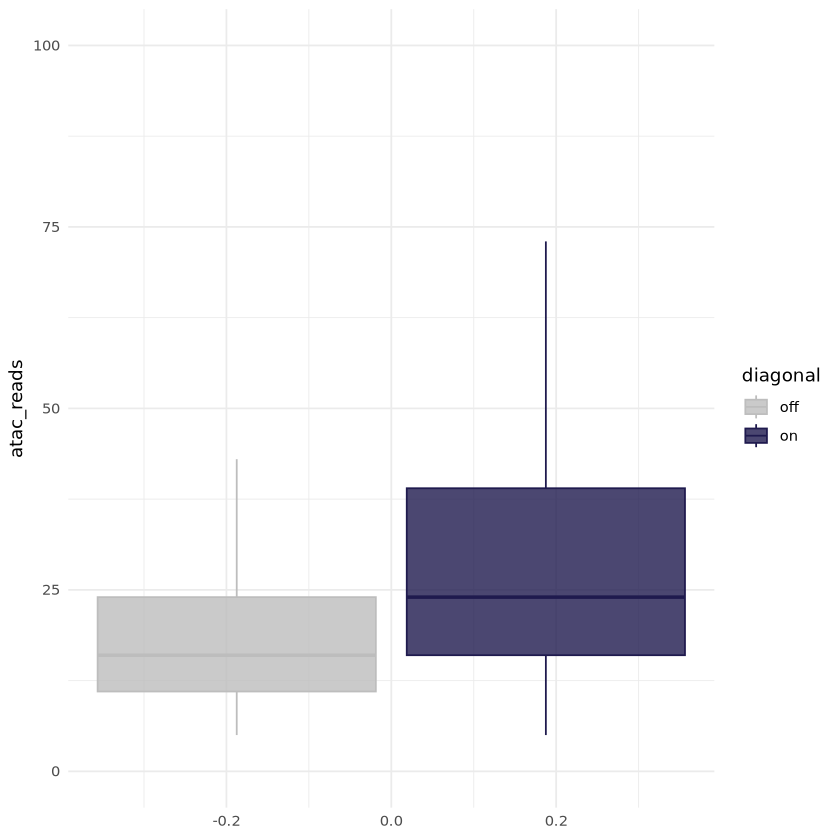

Warning message:
“Removed 32700 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 361 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


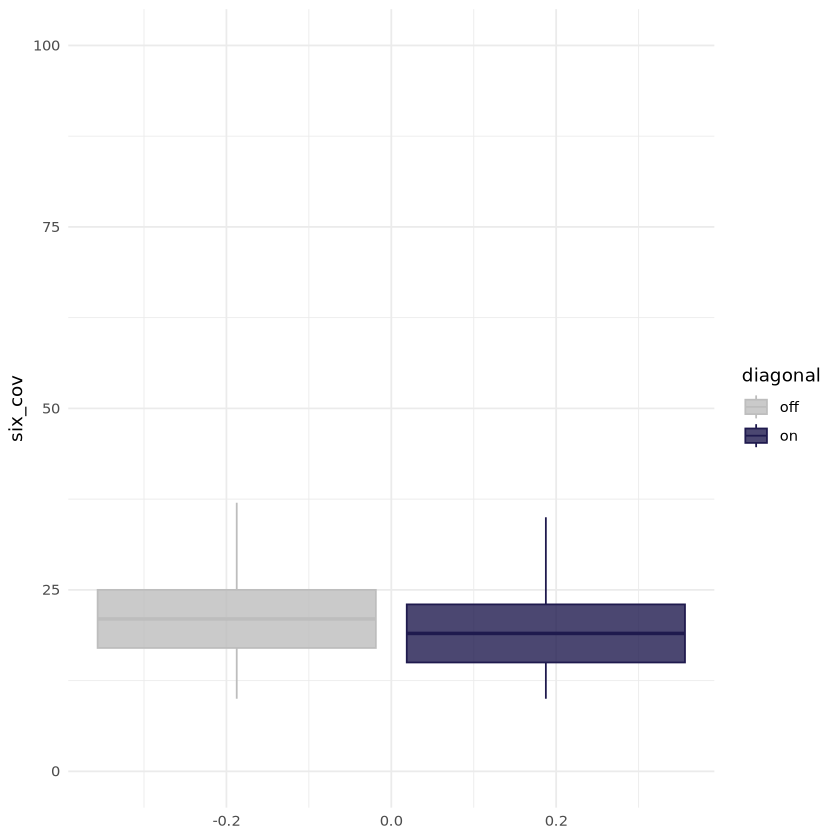

In [12]:
day0_shared_cpg_wdist<- day0_shared_cpg_plot %>% 
        mutate(diagonal = case_when(abs(line_dist) < 0.2 ~ "on", abs(line_dist) >= 0.2 ~ "off"))
mean(filter(day0_shared_cpg_plot, abs(line_dist) < 0.2)$atac_reads)
mean(filter(day0_shared_cpg_plot, abs(line_dist) >= 0.2)$atac_reads)
      
day0_shared_cpg_wdist$diagonal <- as.factor(day0_shared_cpg_wdist$diagonal)
day0_shared_cpg_wdist_p<- ggplot(day0_shared_cpg_wdist)+
                geom_boxplot(aes(y= atac_reads, fill = diagonal, color= diagonal),alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#1f1a4e"))+
                scale_fill_manual(values= c("#bdbdbd","#1f1a4e"))+
                ylim(c(0,100))+
                 theme_minimal()
day0_shared_cpg_wdist_p     

mean(filter(day0_shared_cpg_plot, abs(line_dist) < 0.2)$six_cov)
mean(filter(day0_shared_cpg_plot, abs(line_dist) >= 0.2)$six_cov)
day0_6base_cpg_wdist_p<- ggplot(day0_shared_cpg_wdist)+
                geom_boxplot(aes(y= six_cov, fill = diagonal, color= diagonal),alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#1f1a4e"))+
                scale_fill_manual(values= c("#bdbdbd","#1f1a4e"))+
                ylim(c(0,100))+
                theme_minimal()
day0_6base_cpg_wdist_p

ggsave(day0_shared_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/0day_atacme_read_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)
ggsave(day0_6base_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/0day_6base_cov_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)

[1] 94.93794

[1] 55.49155

Warning message:
“Removed 287739 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


[1] 15.47676

[1] 16.33874

Warning message:
“Removed 290 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


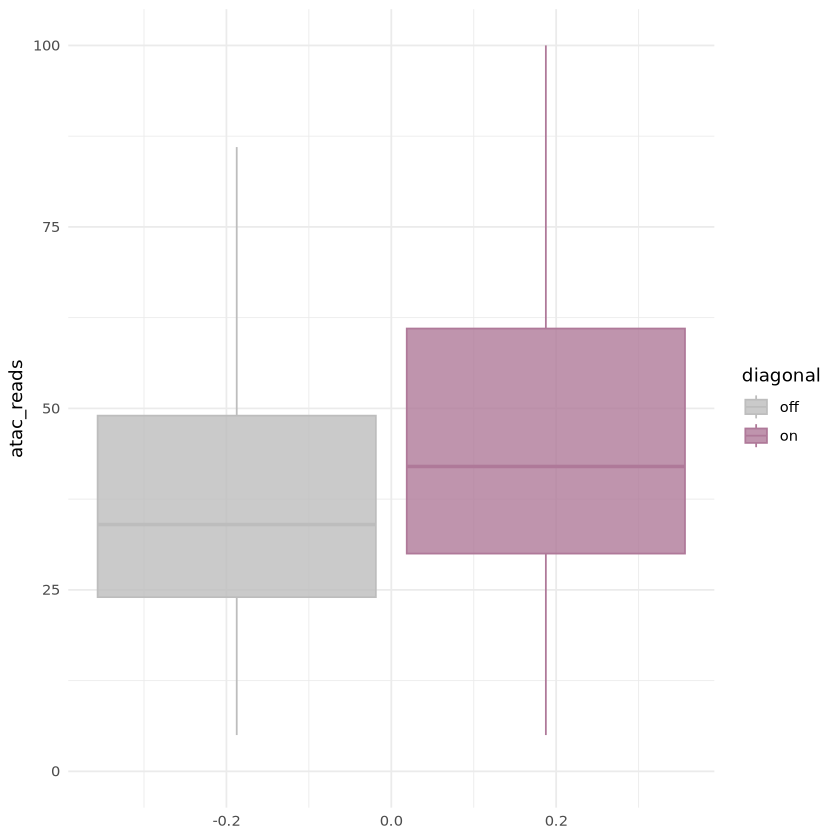

Warning message:
“Removed 287739 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 290 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


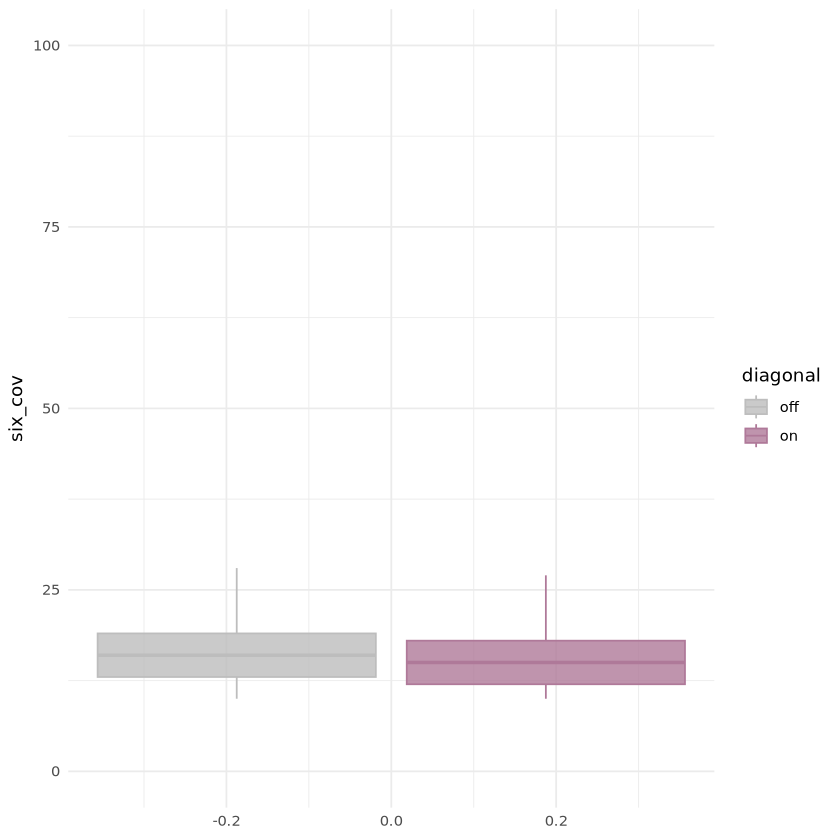

In [13]:
day4_shared_cpg_wdist<- day4_shared_cpg_plot %>% 
        mutate(diagonal = case_when(abs(line_dist) < 0.2 ~ "on", abs(line_dist) >= 0.2 ~ "off"))
mean(filter(day4_shared_cpg_plot, abs(line_dist) < 0.2)$atac_reads)
mean(filter(day4_shared_cpg_plot, abs(line_dist) >= 0.2)$atac_reads)

day4_shared_cpg_wdist$diagonal <- as.factor(day4_shared_cpg_wdist$diagonal)
day4_shared_cpg_wdist_p<- ggplot(day4_shared_cpg_wdist)+
                geom_boxplot(aes(y= atac_reads, fill = diagonal, color= diagonal),alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#af7999"))+
                scale_fill_manual(values= c("#bdbdbd","#af7999"))+
                ylim(c(0,100))+
                theme_minimal()
day4_shared_cpg_wdist_p     

mean(filter(day4_shared_cpg_plot, abs(line_dist) < 0.2)$six_cov)
mean(filter(day4_shared_cpg_plot, abs(line_dist) >= 0.2)$six_cov)
day4_6base_cpg_wdist_p<- ggplot(day4_shared_cpg_wdist)+
                geom_boxplot(aes(y=six_cov, fill = diagonal, color= diagonal),alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#af7999"))+
                scale_fill_manual(values= c("#bdbdbd","#af7999"))+
                ylim(c(0,100))+
                theme_minimal()
day4_6base_cpg_wdist_p
ggsave(day4_shared_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/4day_atacme_read_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)
ggsave(day4_6base_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/4day_6base_cov_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)

[1] 81.84384

[1] 49.2111

Warning message:
“Removed 289461 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


[1] 19.0946

[1] 22.29085

Warning message:
“Removed 408 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


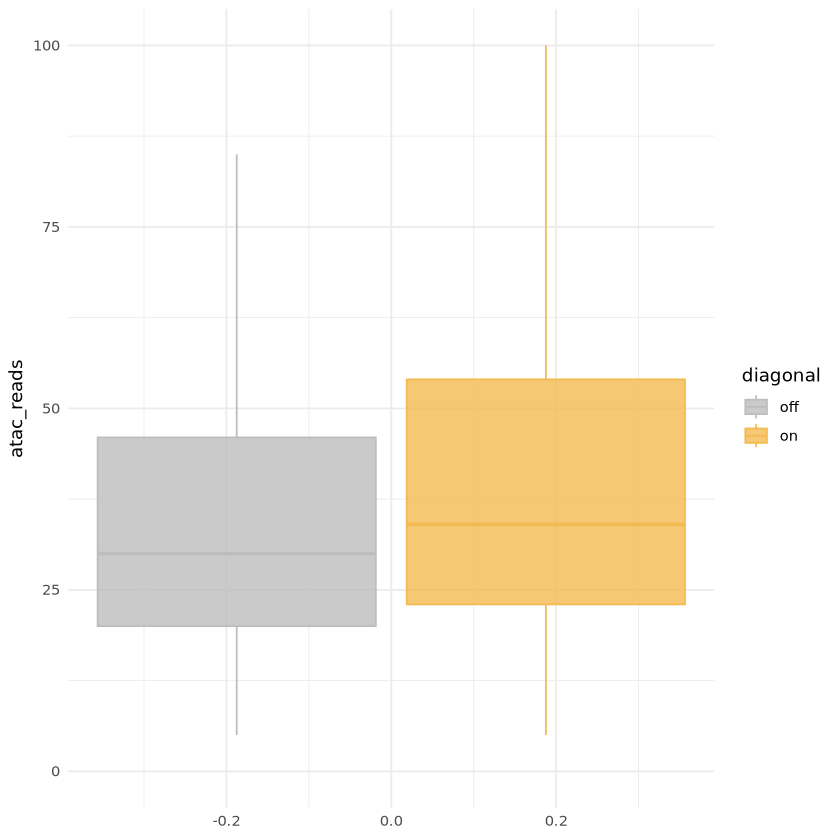

Warning message:
“Removed 289461 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 408 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


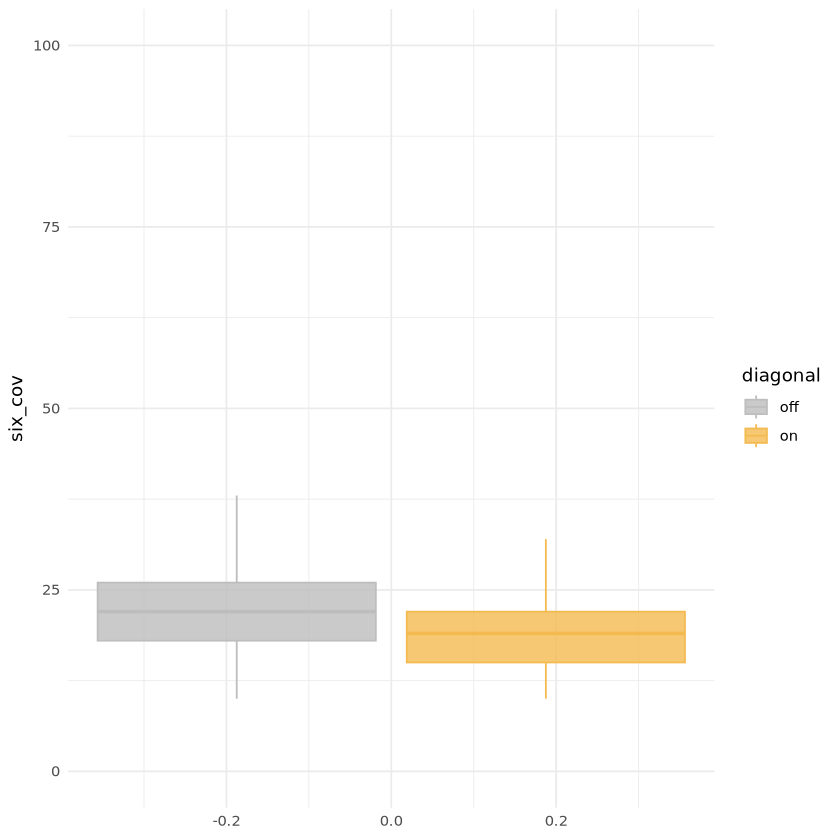

In [14]:
day8_shared_cpg_wdist<- day8_shared_cpg_plot %>% 
        mutate(diagonal = case_when(abs(line_dist) < 0.2 ~ "on", abs(line_dist) >= 0.2 ~ "off"))
mean(filter(day8_shared_cpg_plot, abs(line_dist) < 0.2)$atac_reads)
mean(filter(day8_shared_cpg_plot, abs(line_dist) >= 0.2)$atac_reads)

day8_shared_cpg_wdist$diagonal<- factor(day8_shared_cpg_wdist$diagonal)
day8_atac_cpg_wdist_p<- ggplot(day8_shared_cpg_wdist)+
                geom_boxplot(aes(y= atac_reads, fill = diagonal, color= diagonal), alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#f3ba50"))+
                scale_fill_manual(values= c("#bdbdbd","#f3ba50"))+
                ylim(c(0,100))+
                theme_minimal()
day8_atac_cpg_wdist_p     

mean(filter(day8_shared_cpg_plot, abs(line_dist) < 0.2)$six_cov)
mean(filter(day8_shared_cpg_plot, abs(line_dist) >= 0.2)$six_cov)
day8_6base_cpg_wdist_p<- ggplot(day8_shared_cpg_wdist)+
                geom_boxplot(aes(y= six_cov, fill = diagonal, color= diagonal), alpha = 0.8, outlier.shape = NA)+
                scale_color_manual(values= c("#bdbdbd","#f3ba50"))+
                scale_fill_manual(values= c("#bdbdbd","#f3ba50"))+
                ylim(c(0,100))+
                theme_minimal()
day8_6base_cpg_wdist_p     

ggsave(day8_atac_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/8day_atacme_read_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)
ggsave(day8_6base_cpg_wdist_p, file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/8day_6base_cov_diagonal_hmCmC.pdf",
      unit= "in", height = 2.5, width = 4)

## Plot correlation between two methods at each timepoint using the hmC+mC 6-base value, Figure S3D
this is being done at regions that were called as peaks at individual timepoints, not dynamic regions or consensus regions


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




region_chr,region_start,region_end,atacme_avg,sixbase_avg,atacme_cov,sixbase_cov,time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,629036,634960,0.006148020,0.55339823,2189.72043,21.73118,day0
chr1,778524,779159,0.019073419,0.01024484,37.33333,18.72222,day0
chr1,845758,845939,0.151315800,0.35021410,13.50000,34.50000,day0
chr1,869841,870031,0.022452152,0.03681973,24.47619,15.61905,day0
chr1,921170,921367,0.006538458,0.05554534,19.91667,19.58333,day0
chr1,939211,939380,0.180482890,0.22723100,18.30000,17.80000,day0


[1] 0.9054147

[1] 0.911125

[1] 0.8653939

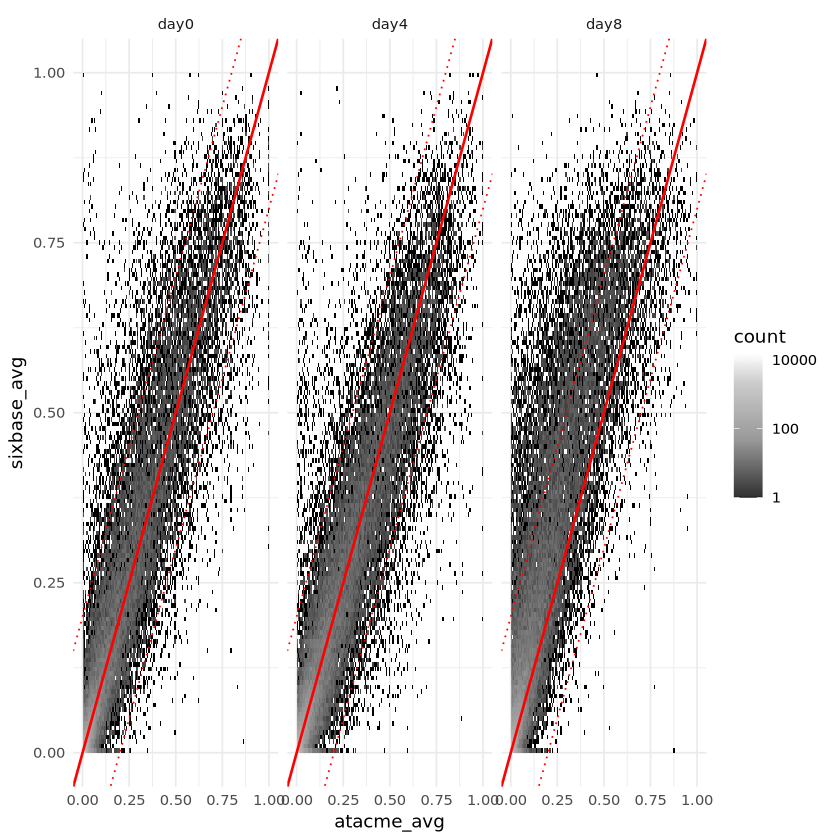

In [16]:
library(viridis)
library(scales)
head(day0_day0acc_byreg)
day0_day0acc_byreg<- mutate(day0_day0acc_byreg, time = "day0")
day4_day4acc_byreg<- mutate(day4_day4acc_byreg, time = "day4")
day8_day12acc_byreg<- mutate(day8_day12acc_byreg, time = "day8")
acc_reg_p<- rbind(day0_day0acc_byreg,day4_day4acc_byreg,day8_day12acc_byreg)

acc_reg_hmCmC_p<- ggplot(acc_reg_p)+
                stat_bin2d(aes(x= atacme_avg, y=sixbase_avg), bins =150)+
                geom_abline(color = "red", linewidth = 0.75, intercept = 0, slope = 1)+
                geom_abline(color = "red", linewidth = 0.5, linetype = "dotted", intercept = -0.2, slope = 1)+
                geom_abline(color = "red", linewidth = 0.5, linetype = "dotted", intercept = 0.2, slope = 1)+
                facet_wrap(~time)+
                scale_fill_gradientn(trans="log10", 
                                     colours = c("black","grey20","grey40","grey60","grey80","white"),
                                     values = rescale(c(0,100,2500,5000,10000,12500)),
                                    limits=c(1,15000))+
                theme_minimal()
acc_reg_hmCmC_p

cor(day0_day0acc_byreg$atacme_avg, day0_day0acc_byreg$sixbase_avg, method = "pearson") # was 0.890176939133187 with mC
cor(day4_day4acc_byreg$atacme_avg, day4_day4acc_byreg$sixbase_avg, method = "pearson") # was 0.857096111064284
cor(day8_day12acc_byreg$atacme_avg, day8_day12acc_byreg$sixbase_avg, method = "pearson") # 0.869521726126356

ggsave(acc_reg_hmCmC_p,file = "/data/hodges_lab/NPCdiff_ATACme/data/correlation/with_6base/allTPacc_allTPpeaks_hmCmC.pdf",
      unit= "in", height = 3, width = 8 )
